In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sentiment-analysis-project/Sentiment Analysis/amazon_cells_labelled.txt
/kaggle/input/sentiment-analysis-project/Sentiment Analysis/imdb_labelled.txt
/kaggle/input/sentiment-analysis-project/Sentiment Analysis/yelp_labelled.txt


In [2]:
import spacy
import pandas as pd
import numpy as np
from spacy.lang.en.stop_words import STOP_WORDS

In [3]:
nlp=spacy.load('en_core_web_lg')

In [4]:
df1=pd.read_csv('/kaggle/input/sentiment-analysis-project/Sentiment Analysis/amazon_cells_labelled.txt',sep='\t',header=None)

In [5]:
df1.head()

,0,1
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1


In [6]:
columns=['text','label']
df1.columns=columns
df1.head()

,text,label
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1


In [7]:
df1.shape

(1000, 2)

In [8]:
df2=pd.read_csv('/kaggle/input/sentiment-analysis-project/Sentiment Analysis/imdb_labelled.txt',sep='\t',header=None)

In [9]:
df2.columns=columns
df2.head()

,text,label
0,"A very, very, very slow-moving, aimless movie ...",0
1,Not sure who was more lost - the flat characte...,0
2,Attempting artiness with black & white and cle...,0
3,Very little music or anything to speak of.,0
4,The best scene in the movie was when Gerardo i...,1


In [10]:
df2.shape

(748, 2)

In [11]:
df3=pd.read_csv('/kaggle/input/sentiment-analysis-project/Sentiment Analysis/yelp_labelled.txt',sep='\t',header=None)
df3.head()

,0,1
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [12]:
df3.columns=columns
df3.shape

(1000, 2)

In [13]:
df=pd.concat([df1,df2,df3],ignore_index=True)

In [14]:
df.shape

(2748, 2)

In [15]:
df.sample(5)

,text,label
1829,walked in and the place smelled like an old gr...,0
1125,"If this premise sound stupid, that's because i...",0
56,VERY DISAPPOINTED.,0
1361,The best example of how dumb the writing is wh...,0
1768,The Burrittos Blah!,0


In [16]:
df.label.value_counts()

label
1    1386
0    1362
Name: count, dtype: int64

In [17]:
df.isnull().sum()

text     0
label    0
dtype: int64

In [18]:
def preprocess(text):
    doc=nlp(text)
    filtered_words=[]
    for i in doc:
        if i.is_stop or i.is_punct:
            continue
        filtered_words.append(i.lemma_)
    return " ".join(filtered_words)
    

In [19]:
preprocess("Today we are having heavy rainfall, We recommend you to stay at your home and be safe, Do not start running here and there")

'today have heavy rainfall recommend stay home safe start run'

In [20]:
df['preprocessed_text']=df['text'].apply(preprocess)

In [21]:
df.head()

,text,label,preprocessed_text
0,So there is no way for me to plug it in here i...,0,way plug converter
1,"Good case, Excellent value.",1,good case excellent value
2,Great for the jawbone.,1,great jawbone
3,Tied to charger for conversations lasting more...,0,tie charger conversation last 45 minute MAJOR ...
4,The mic is great.,1,mic great


In [22]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report,confusion_matrix

In [23]:
x_train,x_test,y_train,y_test=train_test_split(df.preprocessed_text,df.label,test_size=0.2,random_state=1000,stratify=df.label)

In [24]:
clf1=Pipeline([
    ('vectorizer',CountVectorizer(ngram_range=(1,1))),
    ('nb',MultinomialNB())
])

In [25]:
clf1.fit(x_train,y_train)

Pipeline(steps=[('vectorizer', CountVectorizer()), ('nb', MultinomialNB())])

In [26]:
y_pred=clf1.predict(x_test)

In [27]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.76      0.79       273
           1       0.78      0.84      0.81       277

    accuracy                           0.80       550
   macro avg       0.80      0.80      0.80       550
weighted avg       0.80      0.80      0.80       550



In [28]:
clf1.score(x_test,y_test)

0.8

<Axes: >

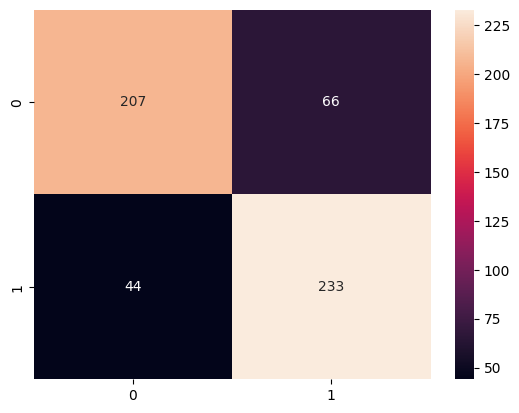

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt='d')

In [30]:
clf2=Pipeline([
    ('vectorizer',TfidfVectorizer()),
    ('nb',MultinomialNB())
])
clf2.fit(x_train,y_train)
y_pred=clf2.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.74      0.78       273
           1       0.77      0.86      0.81       277

    accuracy                           0.80       550
   macro avg       0.80      0.80      0.80       550
weighted avg       0.80      0.80      0.80       550



<Axes: >

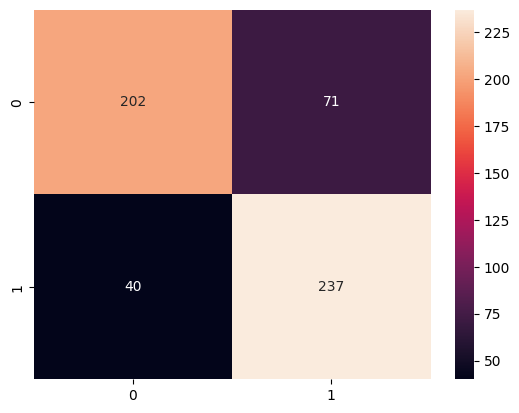

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
cm1=confusion_matrix(y_test,y_pred)
sns.heatmap(cm1,annot=True,fmt='d')

In [32]:
clf3=Pipeline([
    ('vectorizer',CountVectorizer(ngram_range=(1,1))),
    ('svc',LinearSVC())
])
clf3.fit(x_train,y_train)
y_pred=clf3.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.76      0.81      0.78       273
           1       0.80      0.74      0.77       277

    accuracy                           0.78       550
   macro avg       0.78      0.78      0.78       550
weighted avg       0.78      0.78      0.78       550



<Axes: >

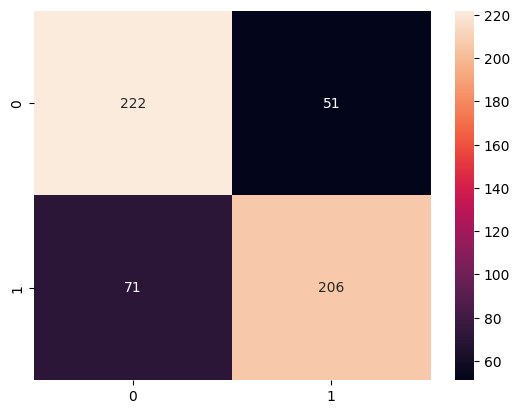

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
cm3=confusion_matrix(y_test,y_pred)
sns.heatmap(cm3,annot=True,fmt='d')

In [34]:
clf4=Pipeline([
    ('vectorizer',TfidfVectorizer()),
    ('svc',LinearSVC())
])
clf4.fit(x_train,y_train)
y_pred=clf4.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.76      0.80      0.78       273
           1       0.79      0.75      0.77       277

    accuracy                           0.78       550
   macro avg       0.78      0.78      0.78       550
weighted avg       0.78      0.78      0.78       550



<Axes: >

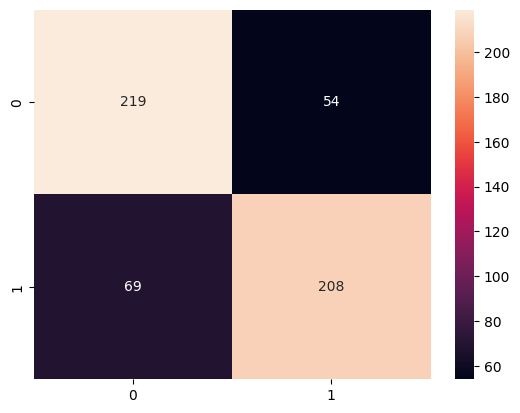

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
cm4=confusion_matrix(y_test,y_pred)
sns.heatmap(cm4,annot=True,fmt='d')

In [36]:
clf1.predict(["Wow you are an amazing person"])

array([1])

In [37]:
clf1.predict(["you suck"])

array([0])

In [38]:
clf1.predict(['pretty'])

array([1])

In [39]:
clf1.predict(["Coke is better than pepsi, but it tastes bad compared to pepsi."])

array([0])

In [40]:
import pickle
with open('sentiment_analysis_model.pkl', 'wb') as f:
    pickle.dump(clf1, f)